## Purpose

This notebook will use simulation to answer the question "How does slope affect ratio measures?"

In [189]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.analysis import *
import numpy as np
from utils.ratios import *
from fooof.utils import trim_spectrum
# Import some utilities for synthesizing some test data
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum
slopes = [] # global scope - will be reset during each function call to not make things messy

In [190]:
# Creates a single simulated spectrum (Theta, alpha, beta)
def gen_sample():
    sample = []
    
    sample.append(np.random.uniform(4, 7)) #Theta freq
    sample.append(np.random.uniform(.35,.75)) #Theta Amp
    sample.append(np.random.uniform(.25,1.05))#Theta SD
    
    sample.append(np.random.uniform(8, 12)) #slow alpha freq
    sample.append(np.random.uniform(.25,.55)) #Alpha Amp
    sample.append(np.random.uniform(.25,1.05))#Alpha SD
    
    sample.append(np.random.uniform(18, 25)) #Beta freq
    sample.append(np.random.uniform(.4,.75)) #Beta Amp
    sample.append(np.random.uniform(.25,1.05))#Beta SD
    
    return sample

In [191]:
# Creates a single control simulated spectrum with no oscillations
# ~NOTE FOR TOM~ So I can't use [0,0,0] because fooof gives me a divide by 0 error - is this a good way to get a null sample?
def gen_null_sample():
    
    return [.0000001,.0000001,.0000001]

The procedure is to make simulated data with and without oscillations, save that data, and analyze it.

The following functions generate group power spectra for cases with and without oscillations. 100 simulations are created for each slope value from .25 to end_slope

In [192]:
#This function will gather ratio data from slope 0 to slope (argument)
def sim_slope_data(end_slope):
    slopes = [] #keeps track of slope - initialized in cell 1
    res = []
    i=1
    while(i*.25 < end_slope):
        slopes.append(i*.25)
        bg = [0,i*.25]
        
        #100 trails for each treatment and control sim
        freq, power, _ = gen_group_power_spectra(100, [1,50], bg,gen_sample(), nlvs=np.random.uniform(.005,.02))
        fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
        fg.fit(freq, power)
        
        res.append(get_group_ratios(fg,[4,8],[15,30]))
        i+=1
    return res

In [193]:
# This function will generate ratio data for psd's with no oscillation.
def sim_null_data(end_slope):
    res = []
    i=1
    while(i*.25 < end_slope):
    
        bg = [0,i*.25]
        
        #100 trails for each treatment and control sim
        freq, power, _ = gen_group_power_spectra(100, [1,50], bg,gen_null_sample(), nlvs=np.random.uniform(.005,.02)) 

        fg = FOOOFGroup(peak_width_limits=[1,8], min_peak_amplitude=0.05, max_n_peaks=3)
        
        fg.fit(freq, power)
        
        res.append(get_group_ratios(fg,[4,8],[15,30]))
        i+=1
    return res
    

In [213]:
sims_data = sim_slope_data(3)
nulls_data = sim_null_data(3)

np.save('./dat/slope_data',sims_data)
np.save('./dat/slope_data_no_osccilation',nulls_data)

In [214]:
def average_of_sims(data):
    res = []
    
    for i in range(len(data)):
        method = []
        for j in range(len(data[i])):
            method.append(np.mean(data[i][j]))
        res.append(method)

    return res

In [215]:
sim = average_of_sims(sim_data)
null = average_of_sims(null_data)

## Using Pandas

In [216]:
df_sim = pd.DataFrame(sim,columns=["average_power","central_frequency", "power_density" ])
df_null = pd.DataFrame(null,columns=["average_power","central_frequency", "power_density" ])

In [200]:
df_sim

,average_power,central_frequency,power_density
0,-0.638081,1.373130,-0.185249
1,0.060927,0.919640,0.017688
2,0.530553,0.557963,0.154032
3,0.534662,0.642793,0.155225
4,0.439357,1.564072,0.127555
5,0.474496,1.471040,0.137757
6,0.517454,0.859973,0.150229
7,0.537551,0.792237,0.156063
8,0.520955,1.562591,0.151245
9,0.530711,1.088086,0.154077


In [201]:
df_null

,average_power,central_frequency,power_density
0,0.571647,NaN,0.165962
1,0.571769,NaN,0.165997
2,0.571797,NaN,0.166006
3,0.570980,NaN,0.165768
4,0.571179,NaN,0.165826
5,0.571797,NaN,0.166006
6,0.571456,NaN,0.165907
7,0.571717,NaN,0.165982
8,0.571554,NaN,0.165935
9,0.571494,NaN,0.165918


In [202]:
# Acquires the values for each column in DataFrames
average_power_sim = df_sim.average_power.values
central_frequency_sim = df_sim.central_frequency.values
power_density_sim = df_sim.power_density.values

average_power_null = df_null.average_power.values
central_frequency_null = df_null.central_frequency.values
power_density_null = df_null.power_density.values

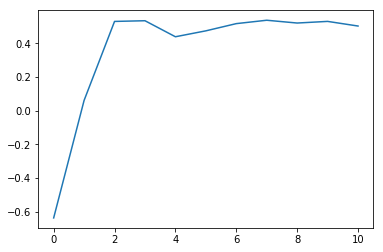

In [203]:
plt.plot(average_power_sim)

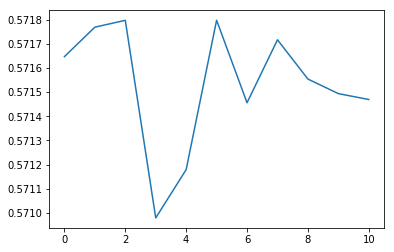

In [204]:
plt.plot(average_power_null)

We cannot use the central frequency method because it uses peak information to find central frequency but we dont have peaks because we do not induce "oscillations" in the syth

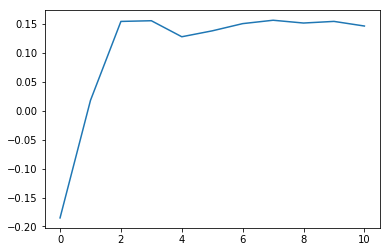

In [205]:
plt.plot(power_density_sim)

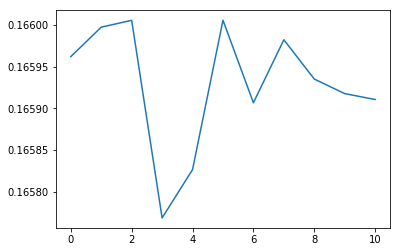

In [206]:
plt.plot(power_density_null)

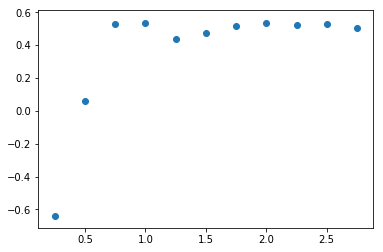

In [210]:
plt.scatter(slopes,average_power_sim)

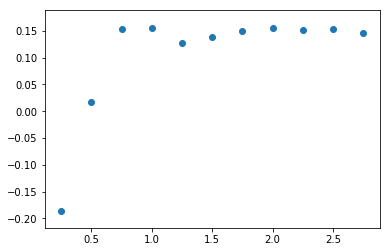

In [211]:
plt.scatter(slopes,power_density_sim)